In [207]:
import pandas as pd
import numpy as np
import soundfile as sf
import random
excel_file_path = "C:/Users/Misara/OneDrive/Desktop/echo-ha/noise_100.xlsx"

# # Read the Excel file into a pandas DataFrame
df_ = pd.read_excel(excel_file_path)

# excel_file_path2 = "C:/Users/DELL/Downloads/echo-ha-20231219T121325Z-001/echo-ha/clean_1.xlsx"

# # Read the Excel file into a pandas DataFrame
# df2 = pd.read_excel(excel_file_path)

In [186]:
df = df/1000
df

,0
0,-0.139
1,-0.046
2,0.016
3,-0.009
4,0.030
...,...
22045,3.666
22046,1.192
22047,-0.863
22048,-2.635


In [187]:
df = df.values
df = df.flatten()
df = df.T

In [188]:
x = df[3307:4851]
#df[4851]

In [189]:
# x = np.array(x)
x

array([2.000e-03, 2.000e-03, 9.000e-03, ..., 2.389e+00, 2.872e+00,
       3.263e+00])

In [190]:
w_old = []
for i in range(1544):
    w_old.append(random.uniform(0,0.001))

In [191]:
w_old = np.array(w_old)

In [192]:
w_old_T = w_old.T
w_old_T.shape

(1544,)

In [193]:
w_old_T

array([8.13442712e-04, 9.40665101e-04, 3.19071065e-04, ...,
       8.05345228e-04, 7.59549497e-04, 1.63879097e-05])

In [194]:
x_new = []
x_new = np.multiply(x,w_old_T)
summation = np.dot(x,w_old_T)

In [195]:
df[4851] = df[4851]-summation

In [196]:
miu = 0.001
w_old_T = w_old_T + (miu*est*window)

In [197]:
window_size = 1544
miu = 0.001
for i in range(3307, len(df)-window_size+1):
    window = df[i:i+window_size]
    est = np.dot(window,w_old_T)
    if(i+window_size == (len(df)-1) ):
        break
    df[i+window_size] = df[i+window_size] - est
    w_old_T = w_old_T + (miu * est * window)

    #print(window)

In [204]:
df = df*1000

In [205]:
signal = (df).astype(np.int16)

C:\Users\Misara\AppData\Local\Temp\ipykernel_10576\277195311.py:1: RuntimeWarning: invalid value encountered in cast
  signal = (df).astype(np.int16)


In [206]:
from scipy.io.wavfile import write
write("C:/Users/Misara/OneDrive/Desktop/dr_try.wav", 11025, signal)

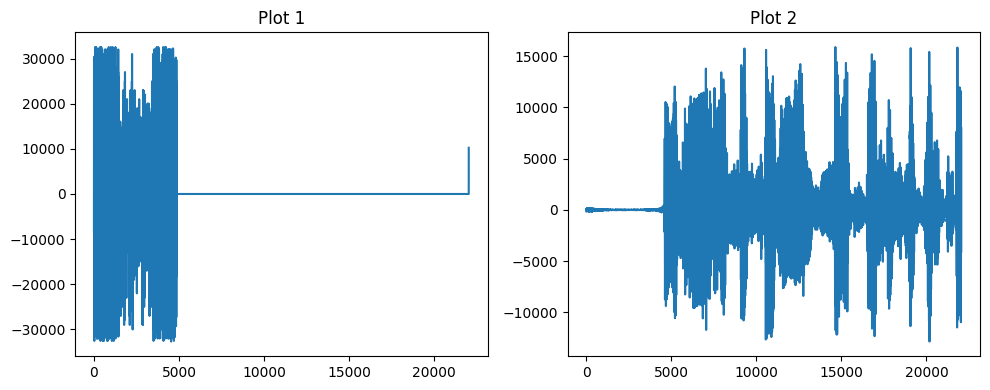

In [208]:
import matplotlib.pyplot as plt
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first set of values in the first subplot
axs[0].plot(signal)
axs[0].set_title('Plot 1')

# Plot the second set of values in the second subplot
axs[1].plot(df_)
axs[1].set_title('Plot 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
x_new

array([8.72602780e-07, 8.33256101e-07, 8.41617059e-06, ...,
       1.47836483e-03, 1.89647430e-03, 1.59343672e-03])

In [ ]:
miu = 0.001

In [ ]:
m = miu*(np.multiply(estimate,x))

ValueError: operands could not be broadcast together with shapes (22050,) (1544,) 

In [ ]:
def sliding_window(array,window_size):
    result = []
    for i in range(len(array)-window_size+1):
        window = array[i:i+window_size]
        #result.append(window)
    return result

In [ ]:
w_new = w_old_T + (miu*estimate*x)
w_new

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
w_old = []
w_new = []

In [ ]:
noise_array = np.array(df)

In [ ]:
noise_array

array([-0.139, -0.046,  0.016, ..., -0.863, -2.635, -4.053])

In [ ]:
circulate_positions=1000
circulated_array = np.concatenate((noise_array[-circulate_positions:], noise_array[:-circulate_positions]))

In [ ]:
print(circulated_array)

[0.032 0.452 0.068 ... 0.413 0.421 0.942]


In [ ]:
print(circulated_array.shape)


(22050,)


In [ ]:

# Number of positions to circulate
circulate_positions = 1


# Initialize an empty matrix to store shifted arrays
shifted_matrix = np.zeros((len(circulated_array), 1000), dtype=int)

# Perform shifting and store in the matrix
for i in range(1000):
    shifted_array = np.concatenate((circulated_array[-circulate_positions:], circulated_array[:-circulate_positions]))
    shifted_matrix[:, i] = shifted_array.flatten() 
    circulate_positions+= 1

# Print the original array
print("Original Array:")
print(circulated_array)

# Print the shifted matrix
print("\nShifted Matrix:")
print(shifted_matrix)


Original Array:
[0.032 0.452 0.068 ... 0.413 0.421 0.942]

Shifted Matrix:
[[0 0 0 ... 3 5 6]
 [0 0 0 ... 1 3 5]
 [0 0 0 ... 0 1 3]
 ...
 [0 0 0 ... 7 8 8]
 [0 0 0 ... 6 7 8]
 [0 0 0 ... 5 6 7]]


In [ ]:
print(circulated_array.shape)

(22050,)


In [ ]:
column_vector_to_insert = circulated_array  # Replace with your actual column vector

# Concatenate the column vector with the existing matrix
new_matrix = np.hstack((column_vector_to_insert, shifted_matrix))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
new_matrix=new_matrix.T

In [ ]:
new_matrix.shape

(1001, 22050)

In [ ]:
alpha = []
for y in range (22050):
    alpha.append(random.uniform(0,0.001))

In [ ]:
weights = alpha

In [ ]:
alpha = []
for y in range (22050):
    alpha.append(random.uniform(0,0.001))

In [ ]:
import random
weights = alpha
for i in range (1000):
    alpha = []
    for y in range (22050):
        alpha.append(random.uniform(0,0.001))
    weights = np.vstack((alpha, weights))
    #np.concatenate(weights.append(alpha)

In [ ]:
len(weights[0])

22050

In [ ]:
len(new_matrix[0])

22050

In [ ]:
weights_sum = []
for i in range (1001):
    x = np.multiply(new_matrix[i],weights[i])
    weights_sum.append(x)

array([-0.12341284,  0.22594351,  0.98523169, ..., -0.17232334,
       -0.24012652, -0.07749157])

In [ ]:
import soundfile as sf
excel_file_path = "C:/Users/DELL/Downloads/echo-ha-20231219T121325Z-001/echo-ha/noise_100.xlsx"

# Read the Excel file into a pandas DataFrame
df_noise = pd.read_excel(excel_file_path)

In [ ]:
noise_100_list= df_noise[0].tolist()
signal_noise = np.array(noise_100_list)
scaled_signal_noise = (signal_noise).astype(np.int16)

In [ ]:
scaled_signal_noise

array([ -139,   -46,    16, ...,  -863, -2635, -4053], dtype=int16)

In [ ]:
from scipy.io.wavfile import write
write("C:/Users/DELL/Downloads/try.wav", 11025, scaled_signal_noise)